<a href="https://colab.research.google.com/github/psood708/MoMacMo/blob/master/UMAP_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

file_in = 'sample_data/test.csv'
data_1 = pd.read_csv(file_in)
data_cpy  = data_1
data_cpy.head()

,timeZero,frame,volume,count,power,x,y,z,t0,twin,vel,label,chanRange,mapType,Unnamed: 14,Unnamed: 15,Unnamed: 16,url
0,2019-09-19T15:14:40Z,5489,1,3866,35.180477,595.505618,660.626030,1950,6.646,0.5,1000,G_EAST,1-380,STACK_POWER,NaN,Event1,.png,Event1.png
1,2019-09-21T23:48:50Z,8574,3,749,0.706797,7.481297,313.432836,1950,6.343,0.5,1000,G_WEST,1-380,STACK_POWER,NaN,Event2,.png,Event2.png
2,2019-09-23T11:07:10Z,4004,5,891,2.822742,408.977556,643.923241,1950,4.177,0.5,1000,G_CENT,1-380,STACK_POWER,NaN,Event3,.png,Event3.png
3,2019-09-25T20:42:20Z,7455,7,1056,6.776137,361.045131,547.974414,1950,7.152,0.5,1000,G_WEST,1-380,WIN_RATIO_RMS,NaN,Event4,.png,Event4.png
4,2019-09-25T20:42:20Z,7455,7,1056,4.946541,334.916865,507.462687,1950,11.184,0.5,1000,G_WEST,1-380,STACK_POWER,NaN,Event5,.png,Event5.png


In [2]:
cols_rem = cols_to_remove = [0,12,14,15,16,17]
data_cpy = data_cpy.drop(data_cpy.columns[cols_to_remove],axis=1)
data_cpy.head()

,frame,volume,count,power,x,y,z,t0,twin,vel,label,mapType
0,5489,1,3866,35.180477,595.505618,660.626030,1950,6.646,0.5,1000,G_EAST,STACK_POWER
1,8574,3,749,0.706797,7.481297,313.432836,1950,6.343,0.5,1000,G_WEST,STACK_POWER
2,4004,5,891,2.822742,408.977556,643.923241,1950,4.177,0.5,1000,G_CENT,STACK_POWER
3,7455,7,1056,6.776137,361.045131,547.974414,1950,7.152,0.5,1000,G_WEST,WIN_RATIO_RMS
4,7455,7,1056,4.946541,334.916865,507.462687,1950,11.184,0.5,1000,G_WEST,STACK_POWER


In [5]:
data_cpy.corr()

<ipython-input-5-b66c987af07b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cpy.corr()


,frame,volume,count,power,x,y,z,t0,twin,vel
frame,1.000000,0.016277,-0.047411,0.053786,-0.095399,-0.108347,NaN,0.070190,NaN,NaN
volume,0.016277,1.000000,-0.012902,0.115049,0.086940,0.067605,NaN,0.041544,NaN,NaN
count,-0.047411,-0.012902,1.000000,0.484252,0.092956,0.137425,NaN,-0.144673,NaN,NaN
power,0.053786,0.115049,0.484252,1.000000,0.039044,-0.057722,NaN,-0.029037,NaN,NaN
x,-0.095399,0.086940,0.092956,0.039044,1.000000,0.398862,NaN,-0.101990,NaN,NaN
y,-0.108347,0.067605,0.137425,-0.057722,0.398862,1.000000,NaN,-0.181471,NaN,NaN
z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t0,0.070190,0.041544,-0.144673,-0.029037,-0.101990,-0.181471,NaN,1.000000,NaN,NaN
twin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import plotly.express as px

features =["frame","volume","count","power","x","y","t0"]
fgi = px.scatter_matrix(data_cpy,dimensions=features,color="volume")
fgi.show()

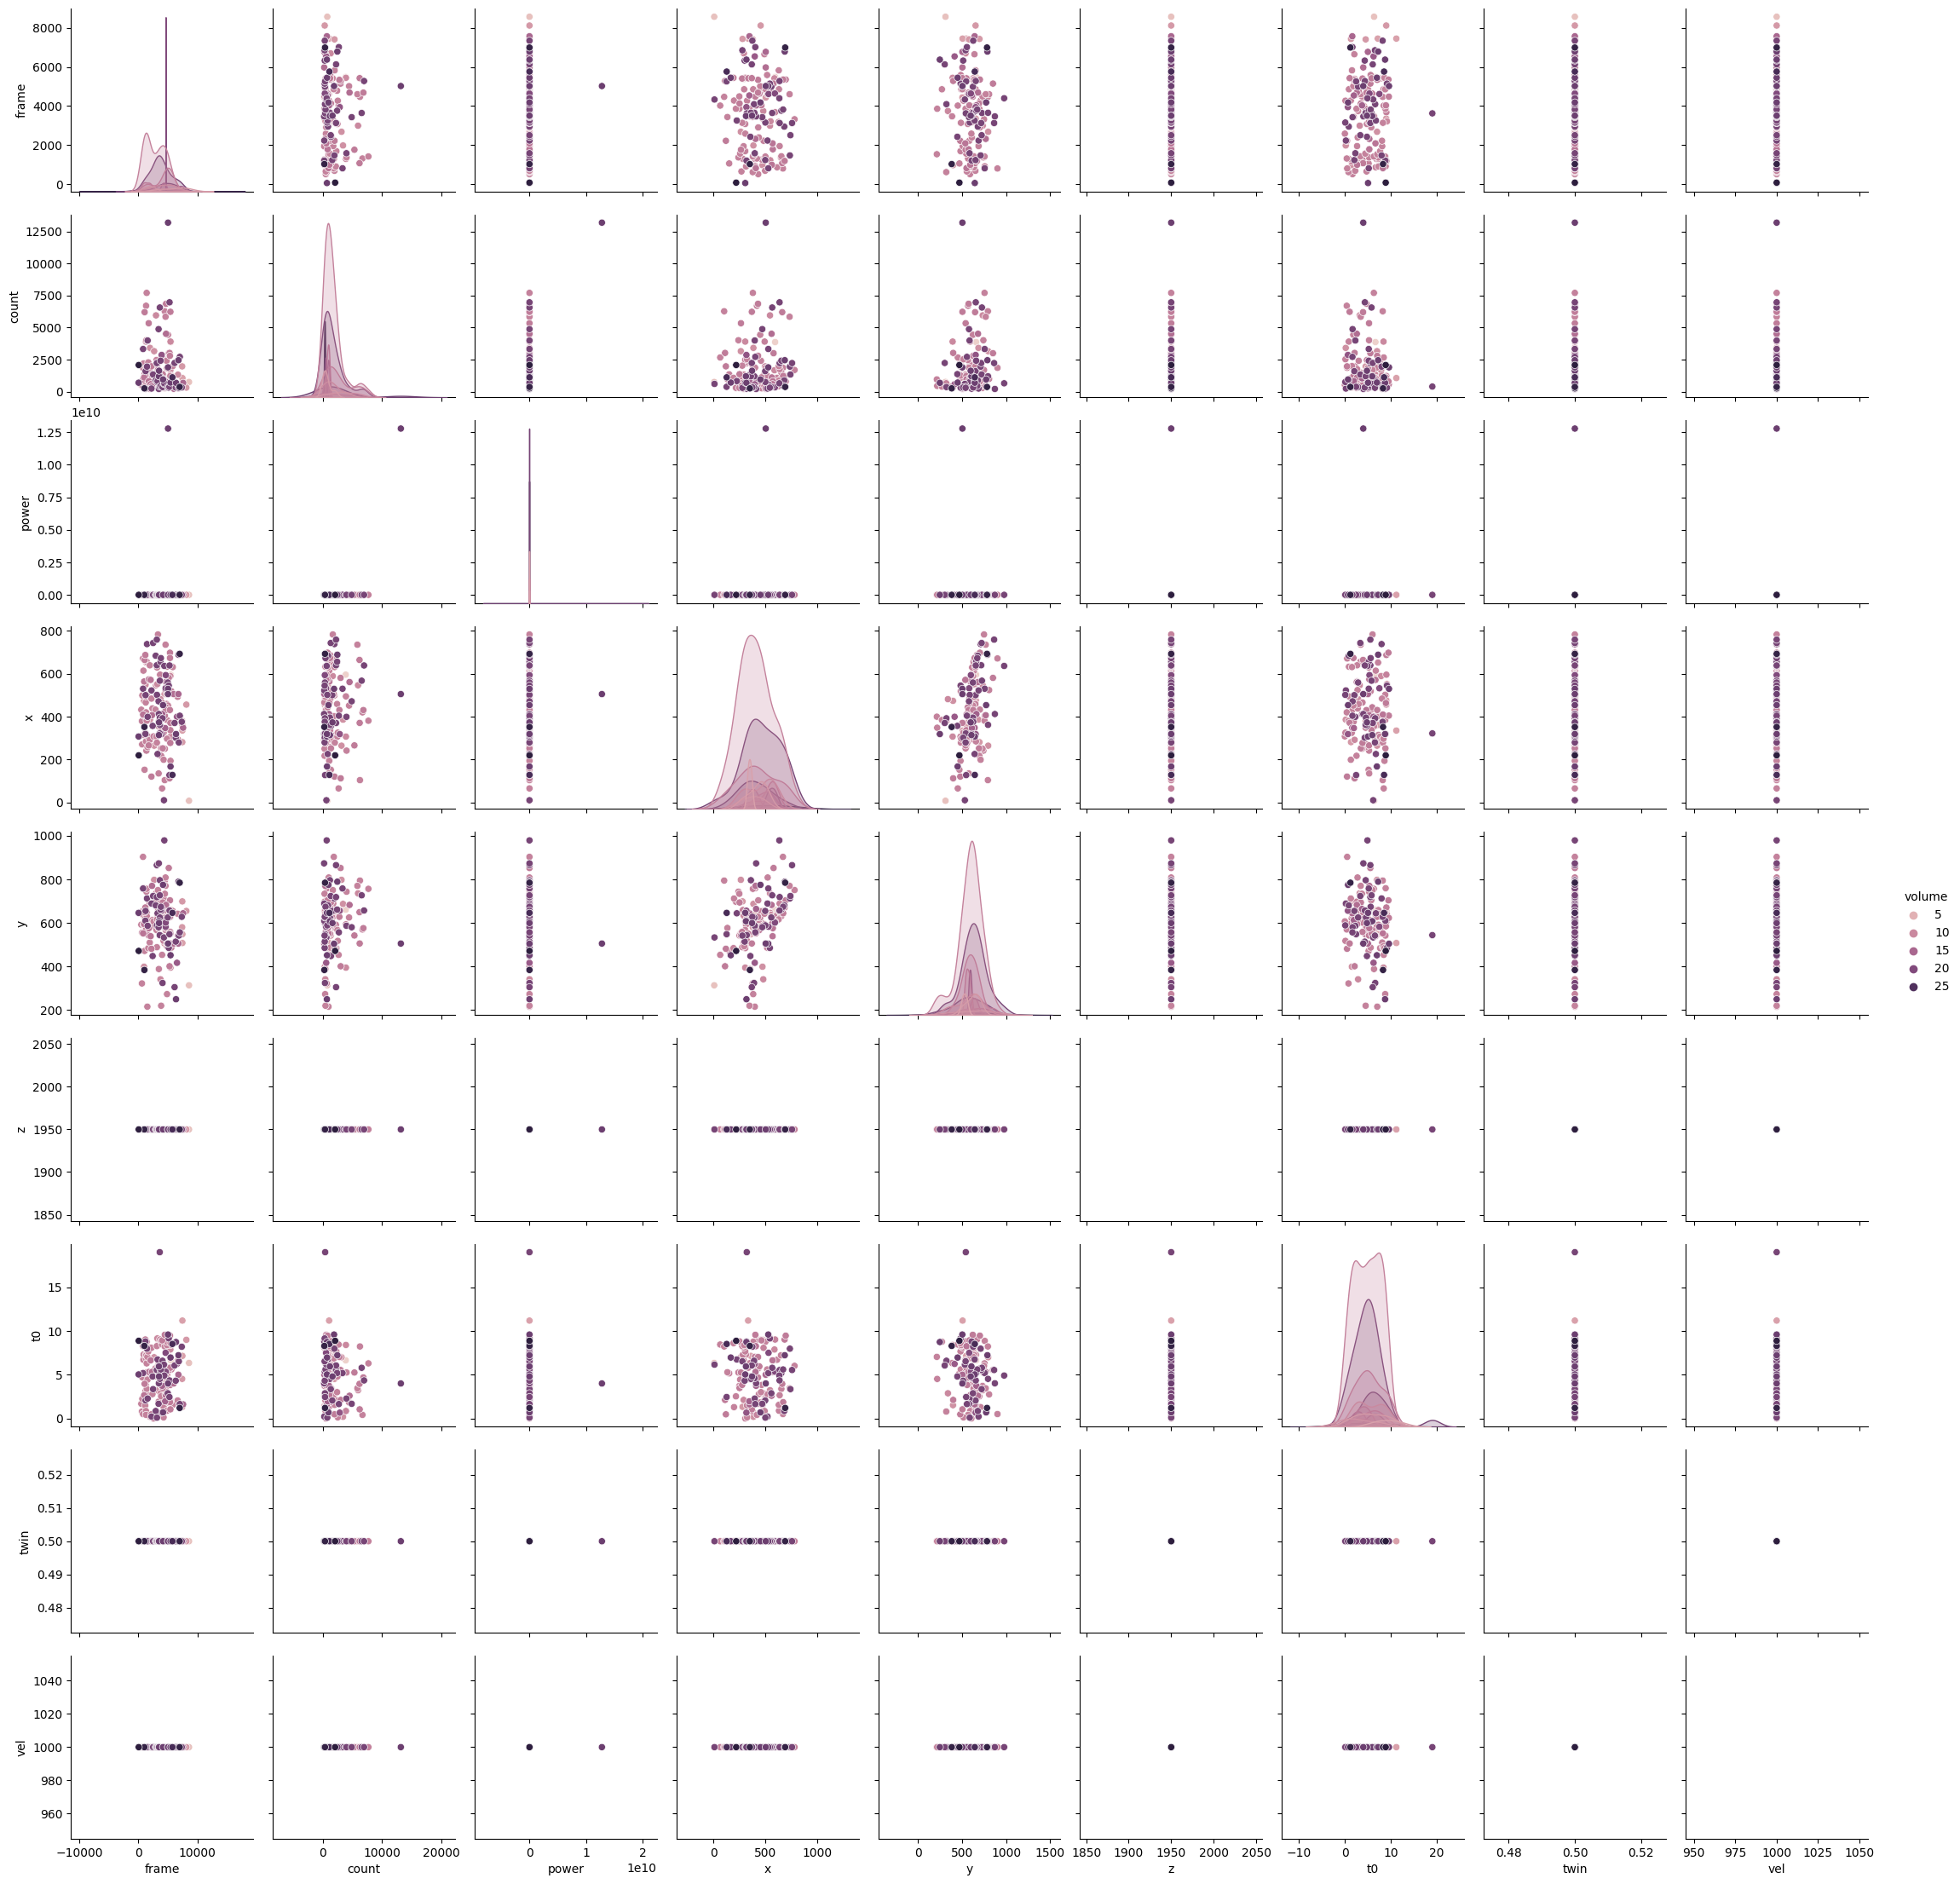

In [8]:
import seaborn as sns
sns.pairplot(data_cpy,hue='volume')